# **House Price Prediction with Feature Scaling and Learning Rate Exploration**

# **1. Import Necessary Libraries**

* Libraries like NumPy, Matplotlib, and sklearn are used for computation and visualization.
* pandas: Used to load and manipulate the dataset in a tabular format (DataFrame).
* numpy: Provides support for numerical operations, including arrays and matrix manipulations.
* matplotlib.pyplot: Used for data visualization.
* sklearn.preprocessing.StandardScaler: Used for feature scaling (Z-score normalization).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import StandardScaler

# **2. Load and Preprocess the Dataset**

* Reads the dataset (in CSV format) into a pandas DataFrame named `df`.
* The dataset is expected to contain columns like:
    * House Size (sq ft)
    * Number of Bedrooms
    * Number of Bathrooms
    * Age of House (years)
    * House Price ($)

In [20]:
# Load dataset
df = pd.read_csv('./house_prices_dataset.csv')
df.head()

,House Size (sq ft),Number of Bedrooms,Number of Bathrooms,Age of House (years),House Price ($)
0,1360,1,1,8,191621
1,4272,1,3,28,513234
2,3592,3,3,28,483823
3,966,3,1,37,202654
4,4926,3,3,41,602226


# **3. Extract Features and Target Variables**

* X_train:
    * Extracts the features (independent variables) as a NumPy array.
    * Each column corresponds to one feature (e.g., house size, bedrooms, etc.).
* y_train:
    * Extracts the target variable (dependent variable) as a NumPy array and reshapes it to a column vector for matrix computations.

In [21]:
# Extract features and target variable
X_train = df[['House Size (sq ft)','Number of Bedrooms', 'Number of Bathrooms', 'Age of House (years)']].values
y_train = df['House Price ($)'].values.reshape(-1, 1)
X_features = ['House Size (sq ft)','Number of Bedrooms', 'Number of Bathrooms', 'Age of House (years)']


In [22]:
# Check for missing values and basic statistics
missing_values = df.isnull().sum()
data_statistics = df.describe()

missing_values, data_statistics

(House Size (sq ft)      0
 Number of Bedrooms      0
 Number of Bathrooms     0
 Age of House (years)    0
 House Price ($)         0
 dtype: int64,
        House Size (sq ft)  Number of Bedrooms  Number of Bathrooms  \
 count          200.000000          200.000000           200.000000   
 mean          2765.835000            2.995000             1.900000   
 std           1238.219332            1.440608             0.844729   
 min            534.000000            1.000000             1.000000   
 25%           1773.000000            2.000000             1.000000   
 50%           2845.000000            3.000000             2.000000   
 75%           3779.500000            4.000000             3.000000   
 max           4996.000000            5.000000             3.000000   
 
        Age of House (years)  House Price ($)  
 count            200.000000       200.000000  
 mean              24.165000    387332.405000  
 std               14.255309    130780.698437  
 min             

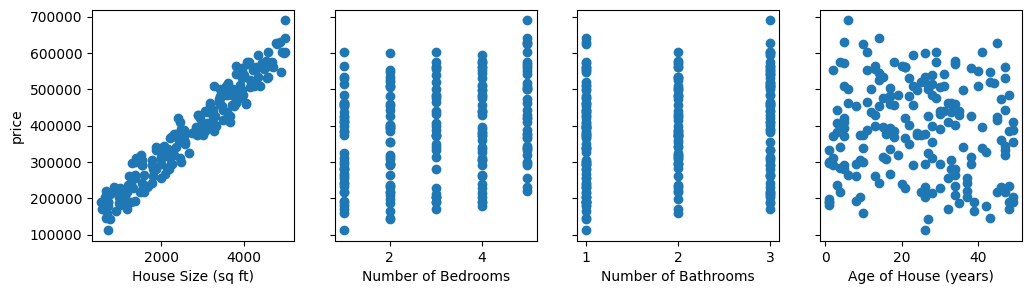

In [23]:
# Scatter plot of features vs. prices
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("price")
plt.show()

# **4. Feature Scaling**

* Z-score normalization is applied to the features to improve convergence during gradient descent.

In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# **5. Initialize Parameters**

* *n_features*: Determines the number of features (columns) in `X_train_scaled`.
* *w*: A column vector initialized to zeros, representing the weights for each feature.
* *b*: A scalar initialized to zero, representing the bias (intercept).
* *learning_rate*: The step size for gradient descent updates.
* *n_iterations*: The number of gradient descent iterations.
* *m*: The number of training examples (rows in `y_train`).

In [25]:
# Initialize parameters
n_features = X_train_scaled.shape[1]
w = np.zeros((n_features, 1))  # Weights initialized to zero
b = 0.0  # Bias initialized to zero
learning_rate = 0.3
n_iterations = 400
m = len(y_train)


# **6. Compute Cost Function**

In [26]:
# Cost function
def compute_cost(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# **6. Gradient Descent Implementation**

In [27]:
# Gradient descent
def gradient_descent(X, y, w, b, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = np.dot(X, w) + b
        dw = (1 / m) * np.dot(X.T, (predictions - y))  # Gradient for weights
        db = (1 / m) * np.sum(predictions - y)  # Gradient for bias
        w -= learning_rate * dw
        b -= learning_rate * db
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
    return w, b, cost_history

# **6. Train the model**

In [28]:
# Train the model
w, b, cost_history = gradient_descent(X_train_scaled, y_train, w, b, learning_rate, n_iterations)

# **8. Visualizations**

## **Cost Function Reduction**

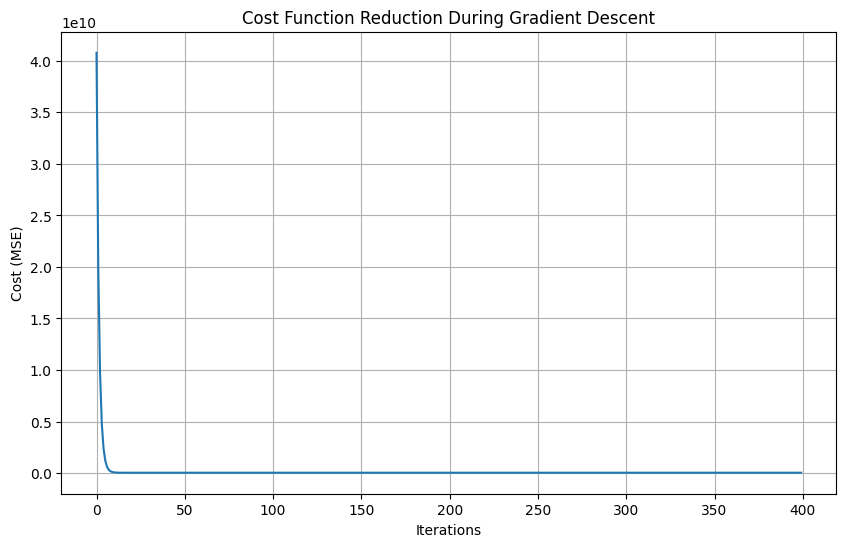

In [29]:
# Plot cost function reduction
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost Function Reduction During Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid()
plt.show()

## **Actual vs Predicted Prices**

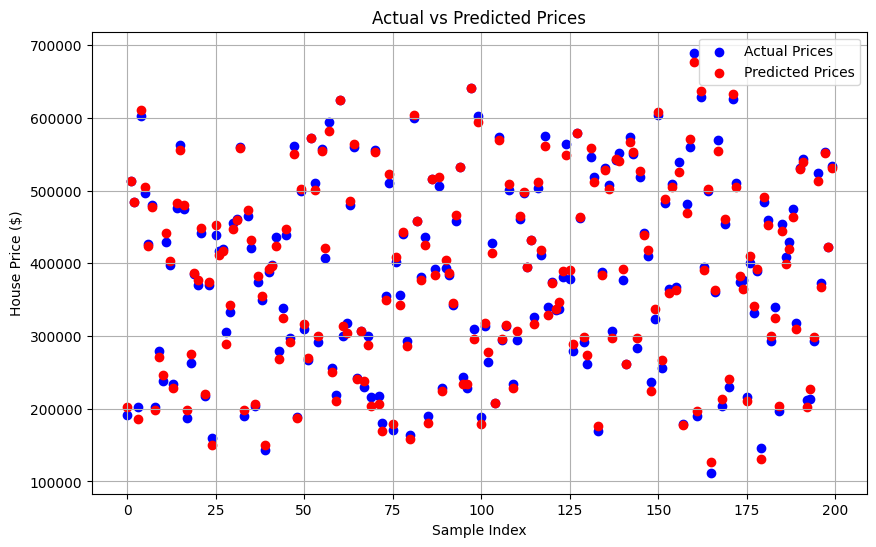

In [30]:
# Compare actual vs. predicted prices
predictions = np.dot(X_train_scaled, w) + b
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_train)), y_train, color="blue", label="Actual Prices")
plt.scatter(range(len(y_train)), predictions, color="red", label="Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Sample Index")
plt.ylabel("House Price ($)")
plt.legend()
plt.grid()
plt.show()

# **10. Model Perfomance Evaluation**

# 1. Quantitative Evaluation

* a. Check Final Cost Value
  * Ensure the final cost value is reasonable (not zero unless it’s synthetic data with perfect relationships).

In [32]:
print(f"Final cost: {cost_history[-1]}")

Final cost: 35544967.58268849


* b. Use Evaluation Metrics
  * Evaluate the model's performance using metrics like MAE, MSE, and R²:
  * MAE: Measures the average error (lower is better).
  * MSE: Penalizes larger errors more than MAE.
  * R²: Should be close to 1 for a good model.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)
r2 = r2_score(y_train, predictions)
print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")

MAE: 7228.221457516353, MSE: 71089935.16537696, R²: 0.9958226801219304


# 2. Qualitative Evaluation

* a. Examine Residuals
  * Plot residuals (differences between actual and predicted values) to check for patterns:
  * Residuals should be randomly distributed around zero. Any pattern may indicate issues with the model (e.g., missing nonlinear relationships).

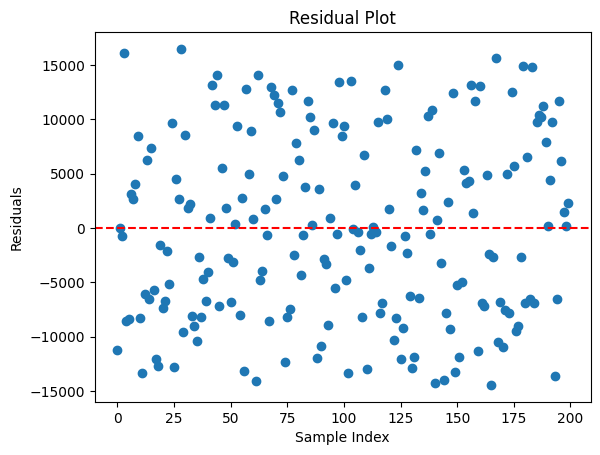

In [34]:
residuals = y_train - predictions
plt.scatter(range(len(y_train)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")
plt.show()

# 3. Check for Overfitting

* If the model performs well on training data but poorly on validation/test data, it may be overfitting.
* Split the data into training and validation sets and compare performance:

In [35]:
from sklearn.model_selection import train_test_split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

w, b, _ = gradient_descent(X_train_split, y_train_split, w, b, learning_rate, n_iterations)
predictions_val = np.dot(X_val_split, w) + b

mae_val = mean_absolute_error(y_val_split, predictions_val)
print(f"Validation MAE: {mae_val}")

Validation MAE: 7941.600936542466


# **10. Save Model Parameters**

In [36]:
# Save model parameters
def save_model_parameters(w, b, scaler, filename="model_parameters.json"):
    mean_values = scaler.mean_.tolist()
    std_values = scaler.scale_.tolist()
    
    model_parameters = {
        "weights": w.flatten().tolist(),
        "bias": float(b),
        "mean_values": mean_values,
        "std_values": std_values
    }
    
    with open(filename, "w") as file:
        json.dump(model_parameters, file)

    print(f"Model parameters saved to {filename}")

# Save the trained parameters
save_model_parameters(w, b, scaler)


Model parameters saved to model_parameters.json


In [18]:
!pip install flask-cors waitress

# **10. API Deployment**

In [19]:
#NB:// Ionly wrote this API but its not the one in use, 
# I am using NEXTJS route handlers for backend logic
from flask import Flask, request, jsonify
from flask_cors import CORS
import json
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Enable CORS for the /predict route, allowing requests from localhost:3000
CORS(app, resources={r"/predict": {"origins": "http://localhost:3000"}})

# Load model parameters
with open("model_parameters.json", "r") as file:
    model_parameters = json.load(file)

weights = np.array(model_parameters["weights"])  # Weights as NumPy array
bias = model_parameters["bias"]  # Scalar for bias
mean_values = np.array(model_parameters["mean_values"])  # Mean for scaling
std_values = np.array(model_parameters["std_values"])  # Std deviation for scaling

# Feature scaling function
def scale_features(features):
    """Scale input features using Z-score normalization."""
    return (features - mean_values) / std_values

@app.route('/predict', methods=['POST', 'OPTIONS'])
def predict():
    # Handle preflight OPTIONS request
    if request.method == 'OPTIONS':
        response = jsonify()
        response.headers.add("Access-Control-Allow-Origin", "http://localhost:3000")
        response.headers.add("Access-Control-Allow-Methods", "POST, OPTIONS")
        response.headers.add("Access-Control-Allow-Headers", "Content-Type, Authorization")
        return response, 204

    try:
        # Parse JSON data from request
        data = request.json

        # Extract input features
        squareFt = float(data["squareFt"])
        bedrooms = float(data["bedrooms"])
        bathrooms = float(data["bathrooms"])
        age = float(data["age"])

        # Combine features and scale
        features = np.array([squareFt, bedrooms, bathrooms, age])
        scaled_features = scale_features(features)

        # Predict using the linear regression model
        prediction = np.dot(weights, scaled_features) + bias

        response = jsonify({"predictedPrice": prediction.tolist()})
        response.headers.add("Access-Control-Allow-Origin", "http://localhost:3000")
        return response

    except KeyError as e:
        return jsonify({"error": f"Missing key: {str(e)}"}), 400
    except Exception as e:
        return jsonify({"error": str(e)}), 500

# Run Flask app
if __name__ == "__main__":
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 5000 is in use by another program. Either identify and stop that program, or start the server with a different port.
On macOS, try disabling the 'AirPlay Receiver' service from System Preferences -> General -> AirDrop & Handoff.


SystemExit: 1

/Users/sheltonsimbi/my_venv/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
